In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

In [3]:
p

x,0,0.01,0.02,0.03,0.04,0.051,0.061,0.071,0.081,0.091,0.1,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.2,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59,0.6,0.61,0.62,0.63,0.64,0.65,0.66,0.67,0.68,0.69,0.7,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,1
y,0.81,0.63,0.47,0.19,0.49,0.77,0.56,0.77,0.61,0.26,0.48,0.22,0.18,0.96,0.62,0.94,0.94,0.97,0.48,0.82,0.9,0.92,0.77,0.92,0.92,0.96,0.82,0.31,0.023,0.42,0.71,0.76,0.82,0.1,0.092,0.45,0.5,0.79,0.46,0.2,0.49,0.13,0.73,0.86,0.83,0.61,0.046,0.043,0.17,0.85,0.84,0.57,0.21,0.089,0.17,0.88,0.93,0.03,0.29,0.049,0.61,0.23,0.48,0.76,0.55,0.15,0.87,0.56,0.26,0.19,0.073,0.23,0.73,0.049,0.9,0.087,0.32,0.26,0.23,0.49,0.42,0.24,0.68,0.17,0.6,0.67,0.29,0.49,0.92,0.27,0.96,0.46,0.84,0.58,0.3,0.94,0.97,0.58,0.36,0.3
a,0,6.4e-05,0.00019,0.00018,0.00079,0.002,0.0021,0.0038,0.004,0.0022,0.0049,0.0027,0.0027,0.017,0.012,0.022,0.025,0.029,0.016,0.03,0.037,0.041,0.038,0.05,0.054,0.061,0.057,0.023,0.0018,0.036,0.065,0.074,0.085,0.011,0.011,0.056,0.066,0.11,0.067,0.03,0.08,0.022,0.13,0.16,0.16,0.13,0.01,0.0097,0.04,0.21,0.21,0.15,0.058,0.026,0.05,0.27,0.3,0.01,0.1,0.017,0.23,0.087,0.19,0.31,0.23,0.066,0.39,0.26,0.12,0.092,0.036,0.12,0.39,0.026,0.5,0.05,0.19,0.16,0.14,0.31,0.27,0.16,0.47,0.12,0.43,0.49,0.22,0.38,0.73,0.22,0.8,0.39,0.73,0.51,0.27,0.86,0.91,0.56,0.35,0.3


In [4]:
p['a']

a,0,6.4e-05,0.00019,0.00018,0.00079,0.002,0.0021,0.0038,0.004,0.0022,0.0049,0.0027,0.0027,0.017,0.012,0.022,0.025,0.029,0.016,0.03,0.037,0.041,0.038,0.05,0.054,0.061,0.057,0.023,0.0018,0.036,0.065,0.074,0.085,0.011,0.011,0.056,0.066,0.11,0.067,0.03,0.08,0.022,0.13,0.16,0.16,0.13,0.01,0.0097,0.04,0.21,0.21,0.15,0.058,0.026,0.05,0.27,0.3,0.01,0.1,0.017,0.23,0.087,0.19,0.31,0.23,0.066,0.39,0.26,0.12,0.092,0.036,0.12,0.39,0.026,0.5,0.05,0.19,0.16,0.14,0.31,0.27,0.16,0.47,0.12,0.43,0.49,0.22,0.38,0.73,0.22,0.8,0.39,0.73,0.51,0.27,0.86,0.91,0.56,0.35,0.3


In [5]:
np.array(p['a'])

array([0.00000000e+00, 6.43176785e-05, 1.93813984e-04, 1.77260411e-04,
       7.92739807e-04, 1.96572401e-03, 2.05018535e-03, 3.84409204e-03,
       3.97525497e-03, 2.15119745e-03, 4.88228569e-03, 2.68093644e-03,
       2.71741754e-03, 1.66206801e-02, 1.23119347e-02, 2.15359056e-02,
       2.46144601e-02, 2.85959828e-02, 1.60284729e-02, 3.01418463e-02,
       3.67455833e-02, 4.13017354e-02, 3.78692995e-02, 4.97570873e-02,
       5.37800579e-02, 6.13973751e-02, 5.68443626e-02, 2.28356478e-02,
       1.80571215e-03, 3.61218531e-02, 6.47806310e-02, 7.44037950e-02,
       8.52963210e-02, 1.11726500e-02, 1.08188462e-02, 5.59388242e-02,
       6.55156631e-02, 1.10850549e-01, 6.73066792e-02, 3.04812286e-02,
       8.03044928e-02, 2.15342285e-02, 1.31017816e-01, 1.62101426e-01,
       1.63275843e-01, 1.26521845e-01, 1.00326528e-02, 9.66524810e-03,
       4.01054164e-02, 2.07626332e-01, 2.13203188e-01, 1.51530316e-01,
       5.84553247e-02, 2.55230228e-02, 4.98972332e-02, 2.70520912e-01,
      

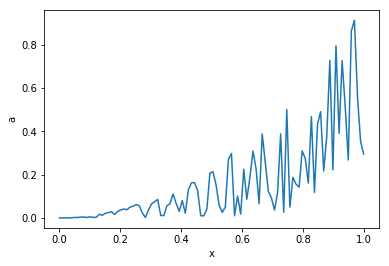

In [6]:
# let's make a simple plot
p.plot('x', 'a')

In [7]:
# different pointdata
p2 = pn.PointData(x=np.random.rand(100))

In [8]:
p2

x,0.45,0.75,0.74,0.61,0.8,0.55,0.19,0.17,0.71,0.12,0.6,0.3,0.093,0.5,0.7,0.2,0.73,0.99,0.53,0.8,0.92,0.53,0.82,0.78,0.75,0.93,0.56,0.74,0.65,0.15,0.2,0.47,0.86,0.64,0.084,0.9,0.64,0.92,0.11,0.34,0.92,0.29,0.23,0.47,0.53,0.87,0.42,0.53,0.77,0.12,0.73,0.093,0.39,0.44,0.78,0.72,0.22,0.55,0.85,0.94,0.0041,0.14,0.7,0.3,0.14,0.85,0.9,0.35,0.84,0.23,0.27,0.23,0.42,0.25,0.6,0.97,0.15,0.44,0.64,0.45,0.79,0.2,0.14,0.18,0.02,0.33,0.99,0.94,0.91,0.17,0.73,0.13,0.65,0.82,0.2,0.45,0.5,0.2,0.9,0.064


In [9]:
p.interp(p2)

x,0.45,0.75,0.74,0.61,0.8,0.55,0.19,0.17,0.71,0.12,0.6,0.3,0.093,0.5,0.7,0.2,0.73,0.99,0.53,0.8,0.92,0.53,0.82,0.78,0.75,0.93,0.56,0.74,0.65,0.15,0.2,0.47,0.86,0.64,0.084,0.9,0.64,0.92,0.11,0.34,0.92,0.29,0.23,0.47,0.53,0.87,0.42,0.53,0.77,0.12,0.73,0.093,0.39,0.44,0.78,0.72,0.22,0.55,0.85,0.94,0.0041,0.14,0.7,0.3,0.14,0.85,0.9,0.35,0.84,0.23,0.27,0.23,0.42,0.25,0.6,0.97,0.15,0.44,0.64,0.45,0.79,0.2,0.14,0.18,0.02,0.33,0.99,0.94,0.91,0.17,0.73,0.13,0.65,0.82,0.2,0.45,0.5,0.2,0.9,0.064
y,0.73,0.88,0.067,0.62,0.52,0.72,0.58,1,0.069,0.49,0.37,0.66,0.28,0.91,0.19,0.9,0.34,0.37,0.15,0.51,0.46,0.12,0.44,0.21,0.9,0.82,0.87,0.25,0.6,0.96,0.9,0.03,0.7,0.72,0.48,0.51,0.77,0.53,0.098,-0.015,0.61,0.095,0.79,-0.002,0.13,0.29,0.29,0.12,0.34,0.37,0.74,0.27,0.37,0.83,0.24,0.61,0.78,0.69,0.56,0.65,0.71,0.83,0.15,0.64,0.86,0.51,0.38,0.46,0.37,0.94,0.38,0.86,0.29,0.96,0.14,1.1,0.97,0.84,0.73,0.81,0.26,0.9,0.62,0.69,0.49,0.42,0.38,0.59,0.96,0.98,0.75,0.6,0.15,0.22,0.9,0.76,0.91,0.9,0.41,0.59
a,0.15,0.49,0.038,0.23,0.33,0.22,0.021,0.029,0.034,0.0081,0.14,0.059,0.0025,0.22,0.092,0.035,0.18,0.37,0.043,0.33,0.39,0.034,0.3,0.13,0.5,0.72,0.27,0.14,0.25,0.022,0.037,0.0071,0.52,0.3,0.0033,0.42,0.31,0.45,0.0011,-0.0014,0.52,0.008,0.04,0.00035,0.037,0.22,0.053,0.035,0.2,0.006,0.39,0.0024,0.055,0.16,0.15,0.32,0.039,0.21,0.4,0.57,-1.2e-05,0.015,0.072,0.058,0.015,0.37,0.32,0.058,0.27,0.051,0.028,0.045,0.052,0.062,0.053,0.98,0.023,0.16,0.3,0.16,0.16,0.034,0.013,0.021,0.00019,0.045,0.37,0.52,0.8,0.027,0.4,0.0099,0.061,0.14,0.035,0.16,0.22,0.037,0.34,0.0025


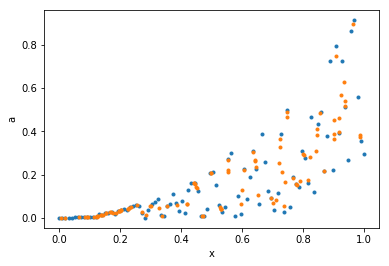

In [10]:
p.plot('x', 'a', '.')
p.interp(p2[['x']], method='linear').plot('x', 'a', '.')

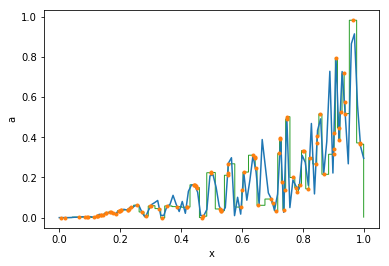

In [11]:
p.plot('x', 'a')
p2.plot('x', 'a', '.')
p2.interp(x=np.linspace(0,1,1000), method='nearest').plot('a')

In [12]:
p.interp(p2)

x,0.45,0.75,0.74,0.61,0.8,0.55,0.19,0.17,0.71,0.12,0.6,0.3,0.093,0.5,0.7,0.2,0.73,0.99,0.53,0.8,0.92,0.53,0.82,0.78,0.75,0.93,0.56,0.74,0.65,0.15,0.2,0.47,0.86,0.64,0.084,0.9,0.64,0.92,0.11,0.34,0.92,0.29,0.23,0.47,0.53,0.87,0.42,0.53,0.77,0.12,0.73,0.093,0.39,0.44,0.78,0.72,0.22,0.55,0.85,0.94,0.0041,0.14,0.7,0.3,0.14,0.85,0.9,0.35,0.84,0.23,0.27,0.23,0.42,0.25,0.6,0.97,0.15,0.44,0.64,0.45,0.79,0.2,0.14,0.18,0.02,0.33,0.99,0.94,0.91,0.17,0.73,0.13,0.65,0.82,0.2,0.45,0.5,0.2,0.9,0.064
y,0.73,0.88,0.067,0.62,0.52,0.72,0.58,1,0.069,0.49,0.37,0.66,0.28,0.91,0.19,0.9,0.34,0.37,0.15,0.51,0.46,0.12,0.44,0.21,0.9,0.82,0.87,0.25,0.6,0.96,0.9,0.03,0.7,0.72,0.48,0.51,0.77,0.53,0.098,-0.015,0.61,0.095,0.79,-0.002,0.13,0.29,0.29,0.12,0.34,0.37,0.74,0.27,0.37,0.83,0.24,0.61,0.78,0.69,0.56,0.65,0.71,0.83,0.15,0.64,0.86,0.51,0.38,0.46,0.37,0.94,0.38,0.86,0.29,0.96,0.14,1.1,0.97,0.84,0.73,0.81,0.26,0.9,0.62,0.69,0.49,0.42,0.38,0.59,0.96,0.98,0.75,0.6,0.15,0.22,0.9,0.76,0.91,0.9,0.41,0.59
a,0.15,0.49,0.038,0.23,0.33,0.22,0.021,0.029,0.034,0.0081,0.14,0.059,0.0025,0.22,0.092,0.035,0.18,0.37,0.043,0.33,0.39,0.034,0.3,0.13,0.5,0.72,0.27,0.14,0.25,0.022,0.037,0.0071,0.52,0.3,0.0033,0.42,0.31,0.45,0.0011,-0.0014,0.52,0.008,0.04,0.00035,0.037,0.22,0.053,0.035,0.2,0.006,0.39,0.0024,0.055,0.16,0.15,0.32,0.039,0.21,0.4,0.57,-1.2e-05,0.015,0.072,0.058,0.015,0.37,0.32,0.058,0.27,0.051,0.028,0.045,0.052,0.062,0.053,0.98,0.023,0.16,0.3,0.16,0.16,0.034,0.013,0.021,0.00019,0.045,0.37,0.52,0.8,0.027,0.4,0.0099,0.061,0.14,0.035,0.16,0.22,0.037,0.34,0.0025


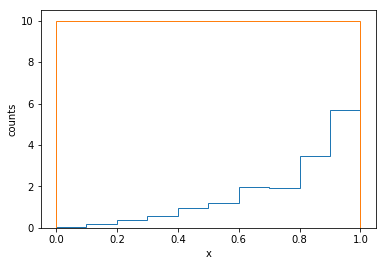

In [13]:
# Generate a histogram function for histograms with weight 'a'
g = p.histogram('x')
g.plot('a')
g.plot('counts')

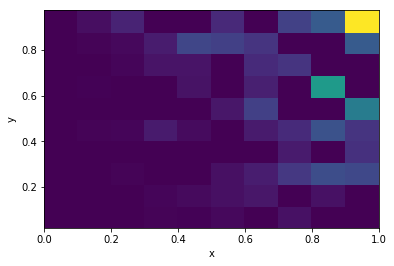

In [14]:
gn = p.histogram('x', 'y')
gn.plot('a')

In [15]:
gn['a']

y \ x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
[0.02 0.12],0,0,0.0018,0.022,0.02,0.053,0,0.11,0,0
[0.12 0.21],0.00018,0.0027,0,0.03,0.062,0.11,0.16,0,0.12,0
[0.21 0.31],0.0022,0.0027,0.023,0,0,0.1,0.21,0.41,0.6,0.56
[0.31 0.4 ],0,0,0,0,0,0,0,0.19,0,0.35
[0.4 0.5],0.00099,0.021,0.036,0.19,0.08,0,0.19,0.31,0.65,0.39
[0.5 0.59],0.0021,0,0,0,0,0.15,0.48,0,0,1.1
[0.59 0.69],0.004,0.012,0,0,0.13,0,0.23,0,1.4,0
[0.69 0.78],0.0058,0,0.038,0.14,0.13,0,0.31,0.39,0,0
[0.78 0.88],0,0.03,0.057,0.2,0.53,0.48,0.39,0,0,0.73
[0.88 0.97],0,0.091,0.24,0,0,0.3,0,0.5,0.73,2.6


In [16]:
np.sum(gn['a'], axis='y')

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
a,0.015,0.16,0.4,0.58,0.95,1.2,2,1.9,3.5,5.7


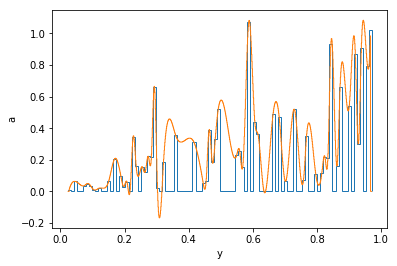

In [17]:
p.histogram(y=100).plot('a')
p.binwise(y=100, function=np.sum, fill_value=np.nan).interp(y=1000, method='cubic').plot('a')

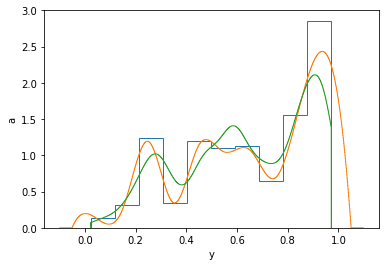

In [18]:
p.histogram('y', density=True).plot('a')
p.histogram(y=np.linspace(-0.1,1.1,13), density=True).interp(y=1000).plot('a')
p.kde(y=1000, density=True, bw=0.05).plot('a')

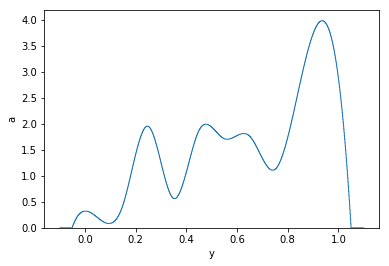

In [19]:
p.binwise(y=np.linspace(-0.1,1.1,13)).interp(y=1000, method='cubic').plot('a')

In [20]:
g = p.histogram(x=10)

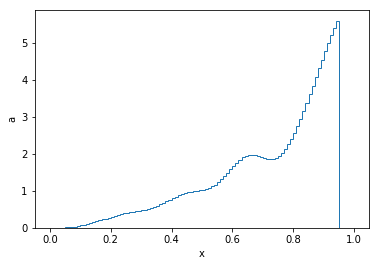

In [21]:
g.interp(x=100).plot('a')

In [22]:
g.interp(x=100)

x,[0. 0.01],[0.01 0.02],[0.02 0.03],[0.03 0.04],[0.04 0.05],[0.05 0.06],[0.06 0.07],[0.07 0.08],[0.08 0.09],[0.09 0.1 ],[0.1 0.11],[0.11 0.12],[0.12 0.13],[0.13 0.14],[0.14 0.15],[0.15 0.16],[0.16 0.17],[0.17 0.18],[0.18 0.19],[0.19 0.2 ],[0.2 0.21],[0.21 0.22],[0.22 0.23],[0.23 0.24],[0.24 0.25],[0.25 0.26],[0.26 0.27],[0.27 0.28],[0.28 0.29],[0.29 0.3 ],[0.3 0.31],[0.31 0.32],[0.32 0.33],[0.33 0.34],[0.34 0.35],[0.35 0.36],[0.36 0.37],[0.37 0.38],[0.38 0.39],[0.39 0.4 ],[0.4 0.41],[0.41 0.42],[0.42 0.43],[0.43 0.44],[0.44 0.45],[0.45 0.46],[0.46 0.47],[0.47 0.48],[0.48 0.49],[0.49 0.5 ],[0.5 0.51],[0.51 0.52],[0.52 0.53],[0.53 0.54],[0.54 0.55],[0.55 0.56],[0.56 0.57],[0.57 0.58],[0.58 0.59],[0.59 0.6 ],[0.6 0.61],[0.61 0.62],[0.62 0.63],[0.63 0.64],[0.64 0.65],[0.65 0.66],[0.66 0.67],[0.67 0.68],[0.68 0.69],[0.69 0.7 ],[0.7 0.71],[0.71 0.72],[0.72 0.73],[0.73 0.74],[0.74 0.75],[0.75 0.76],[0.76 0.77],[0.77 0.78],[0.78 0.79],[0.79 0.8 ],[0.8 0.81],[0.81 0.82],[0.82 0.83],[0.83 0.84],[0.84 0.85],[0.85 0.86],[0.86 0.87],[0.87 0.88],[0.88 0.89],[0.89 0.9 ],[0.9 0.91],[0.91 0.92],[0.92 0.93],[0.93 0.94],[0.94 0.95],[0.95 0.96],[0.96 0.97],[0.97 0.98],[0.98 0.99],[0.99 1. ]
y,nan,nan,nan,nan,nan,5.6,5.6,5.7,5.8,5.9,6,6.1,6.3,6.4,6.5,6.7,6.8,6.9,7,7.1,7.1,7.2,7.2,7.1,7,6.9,6.7,6.5,6.3,6,5.8,5.5,5.3,5.1,4.9,4.8,4.7,4.7,4.7,4.7,4.7,4.7,4.8,4.8,4.8,4.7,4.7,4.6,4.5,4.4,4.3,4.2,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.4,4.5,4.6,4.6,4.7,4.7,4.6,4.5,4.4,4.3,4.1,3.9,3.7,3.6,3.5,3.4,3.3,3.4,3.4,3.5,3.6,3.8,4,4.2,4.4,4.6,4.9,5.1,5.3,5.5,5.7,5.9,6.1,6.2,6.3,6.3,nan,nan,nan,nan,nan
a,nan,nan,nan,nan,nan,0.015,0.018,0.024,0.034,0.047,0.063,0.081,0.1,0.12,0.15,0.17,0.2,0.22,0.25,0.28,0.3,0.33,0.35,0.37,0.39,0.41,0.42,0.44,0.45,0.46,0.48,0.49,0.51,0.53,0.56,0.59,0.63,0.67,0.71,0.75,0.8,0.84,0.88,0.91,0.94,0.96,0.98,0.99,1,1,1,1.1,1.1,1.1,1.2,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.8,1.9,1.9,2,2,2,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,2,2.1,2.3,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4.1,4.3,4.5,4.8,5,5.2,5.4,5.6,nan,nan,nan,nan,nan
counts,nan,nan,nan,nan,nan,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,nan,nan,nan,nan,nan


In [23]:
pn.interp(g, x=100)

x,[0. 0.01],[0.01 0.02],[0.02 0.03],[0.03 0.04],[0.04 0.05],[0.05 0.06],[0.06 0.07],[0.07 0.08],[0.08 0.09],[0.09 0.1 ],[0.1 0.11],[0.11 0.12],[0.12 0.13],[0.13 0.14],[0.14 0.15],[0.15 0.16],[0.16 0.17],[0.17 0.18],[0.18 0.19],[0.19 0.2 ],[0.2 0.21],[0.21 0.22],[0.22 0.23],[0.23 0.24],[0.24 0.25],[0.25 0.26],[0.26 0.27],[0.27 0.28],[0.28 0.29],[0.29 0.3 ],[0.3 0.31],[0.31 0.32],[0.32 0.33],[0.33 0.34],[0.34 0.35],[0.35 0.36],[0.36 0.37],[0.37 0.38],[0.38 0.39],[0.39 0.4 ],[0.4 0.41],[0.41 0.42],[0.42 0.43],[0.43 0.44],[0.44 0.45],[0.45 0.46],[0.46 0.47],[0.47 0.48],[0.48 0.49],[0.49 0.5 ],[0.5 0.51],[0.51 0.52],[0.52 0.53],[0.53 0.54],[0.54 0.55],[0.55 0.56],[0.56 0.57],[0.57 0.58],[0.58 0.59],[0.59 0.6 ],[0.6 0.61],[0.61 0.62],[0.62 0.63],[0.63 0.64],[0.64 0.65],[0.65 0.66],[0.66 0.67],[0.67 0.68],[0.68 0.69],[0.69 0.7 ],[0.7 0.71],[0.71 0.72],[0.72 0.73],[0.73 0.74],[0.74 0.75],[0.75 0.76],[0.76 0.77],[0.77 0.78],[0.78 0.79],[0.79 0.8 ],[0.8 0.81],[0.81 0.82],[0.82 0.83],[0.83 0.84],[0.84 0.85],[0.85 0.86],[0.86 0.87],[0.87 0.88],[0.88 0.89],[0.89 0.9 ],[0.9 0.91],[0.91 0.92],[0.92 0.93],[0.93 0.94],[0.94 0.95],[0.95 0.96],[0.96 0.97],[0.97 0.98],[0.98 0.99],[0.99 1. ]
y,nan,nan,nan,nan,nan,5.6,5.6,5.7,5.8,5.9,6,6.1,6.3,6.4,6.5,6.7,6.8,6.9,7,7.1,7.1,7.2,7.2,7.1,7,6.9,6.7,6.5,6.3,6,5.8,5.5,5.3,5.1,4.9,4.8,4.7,4.7,4.7,4.7,4.7,4.7,4.8,4.8,4.8,4.7,4.7,4.6,4.5,4.4,4.3,4.2,4.1,4.1,4.1,4.1,4.1,4.2,4.3,4.4,4.5,4.6,4.6,4.7,4.7,4.6,4.5,4.4,4.3,4.1,3.9,3.7,3.6,3.5,3.4,3.3,3.4,3.4,3.5,3.6,3.8,4,4.2,4.4,4.6,4.9,5.1,5.3,5.5,5.7,5.9,6.1,6.2,6.3,6.3,nan,nan,nan,nan,nan
a,nan,nan,nan,nan,nan,0.015,0.018,0.024,0.034,0.047,0.063,0.081,0.1,0.12,0.15,0.17,0.2,0.22,0.25,0.28,0.3,0.33,0.35,0.37,0.39,0.41,0.42,0.44,0.45,0.46,0.48,0.49,0.51,0.53,0.56,0.59,0.63,0.67,0.71,0.75,0.8,0.84,0.88,0.91,0.94,0.96,0.98,0.99,1,1,1,1.1,1.1,1.1,1.2,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.8,1.9,1.9,2,2,2,1.9,1.9,1.9,1.9,1.9,1.9,1.9,1.9,2,2.1,2.3,2.4,2.6,2.8,3,3.2,3.4,3.6,3.8,4.1,4.3,4.5,4.8,5,5.2,5.4,5.6,nan,nan,nan,nan,nan
counts,nan,nan,nan,nan,nan,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,nan,nan,nan,nan,nan


In [24]:
p.histogram(x=10).grid

Grid(
Axis("x",
points = None,
edges = array([[0. , 0.1],
       [0.1, 0.2],
       [0.2, 0.3],
       [0.3, 0.4],
       [0.4, 0.5],
       [0.5, 0.6],
       [0.6, 0.7],
       [0.7, 0.8],
       [0.8, 0.9],
       [0.9, 1. ]]))
nbins = 10),)

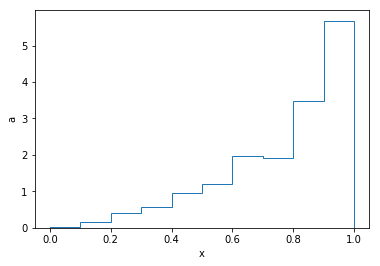

In [25]:
# or in one line
p.histogram('x').plot('a')

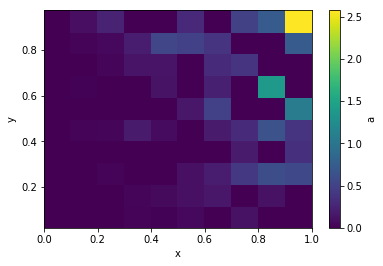

In [26]:
# we can also evaluate the histogram in different dimensions
p.histogram('x', 'y').plot('a', cbar=True)

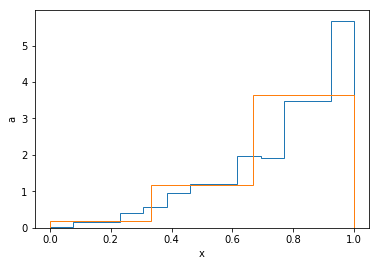

In [27]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('x')
p.histogram('x').resample(x=13).plot('a')
p.histogram('x').resample(x=3).plot('a')


In [28]:
g['a']

x,[0. 0.1],[0.1 0.2],[0.2 0.3],[0.3 0.4],[0.4 0.5],[0.5 0.6],[0.6 0.7],[0.7 0.8],[0.8 0.9],[0.9 1. ]
a,0.015,0.16,0.4,0.58,0.95,1.2,2,1.9,3.5,5.7


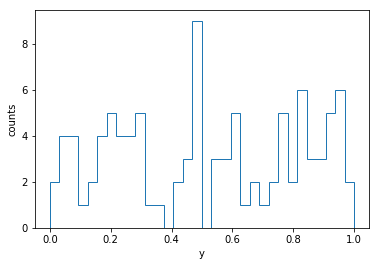

In [29]:
p.histogram(y=np.linspace(0,1,33)).plot('counts')

In [30]:
# the returned object is a GridData type
g = p.histogram(x=20)

In [31]:
# it has a grid defined
g

x,[0. 0.05],[0.05 0.1 ],[0.1 0.15],[0.15 0.2 ],[0.2 0.25],[0.25 0.3 ],[0.3 0.35],[0.35 0.4 ],[0.4 0.45],[0.45 0.5 ],[0.5 0.55],[0.55 0.6 ],[0.6 0.65],[0.65 0.7 ],[0.7 0.75],[0.75 0.8 ],[0.8 0.85],[0.85 0.9 ],[0.9 0.95],[0.95 1. ]
y,2.6,3,2.5,4.2,4.4,2.5,2.5,2.4,3,1.7,1.9,2.2,2.6,2,2,1.4,2.1,2.6,3.1,3.1
a,0.0012,0.014,0.039,0.12,0.22,0.18,0.25,0.33,0.56,0.39,0.5,0.7,1,0.93,1.1,0.85,1.5,2,2.7,3
counts,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [32]:
1//2

0